# Project: Wrangling and Analyze Data

In [3]:
# package installation

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import configparser

In [4]:
# Read the twitter archive data provided.

df_1 = pd.read_csv('twitter-archive-enhanced.csv')

df_1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [24]:
# Use Requests library to download the tweet image prediction.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# Confirm content
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [46]:
# open content in write binary mode (wb) as the content is in byte.

with open(url.split('/')[-1], 'wb') as file:
   
    file.write(response.content)


In [5]:
# read image_predictions tsv file.

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [55]:
# use configparser to read the config.ini file created to hide my keys and tokens.

config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [56]:
# fetch password hidden in config.ini file.

consumer_key = config['twitter']['API_Key']
consumer_secret = config['twitter']['API_Key_secret']
access_token = config['twitter']['Access_Token']
access_secret = config['twitter']['Access_Secret_Token']


In [57]:
# import libraries needed by tweepy to query twitter, authentication handler and timer.

from tweepy import OAuthHandler
from timeit import default_timer as timer


In [58]:
# run authhentication.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [59]:
# Tweet IDs for which to gather additional data via Twitter's API


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()

# each tweet returned as JSON will be saved as a new line in a .txt file

with open ('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ":" + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
    end = timer()
    api =tweepy.API(auth,wait_on_rate_limit=True, sleep_on_rate_limit=False)
    print(end - start)
    print(fails_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


TypeError: __init__() got an unexpected keyword argument 'sleep_on_rate_limit'

In [61]:
# check for numbers of tweets that failed due to error.

len(fails_dict)

108

In [7]:
# create a dataframe from the JSON file returned from quering the twitter API

df_list = []

with open('tweet_json.txt', mode = 'r', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line)
        tweets =  {'tweet_id' : data['id'],
                    'retweet_count' : data['retweet_count'],
                    'favorite_count' : data['favorite_count']}
        df_list.append(tweets)
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
      

In [8]:
# check the dataframe.

tweet_df

tweet_id  retweet_count  favorite_count
0     892420643555336193           6976           33697
1     892177421306343426           5280           29230
2     891815181378084864           3466           21973
3     891689557279858688           7190           36781
4     891327558926688256           7723           35165
...                  ...            ...             ...
2243  666049248165822465             36              88
2244  666044226329800704            115             245
2245  666033412701032449             36             100
2246  666029285002620928             39             112
2247  666020888022790149            420            2283

[2248 rows x 3 columns]

## Assessing Data

In [64]:
# display the twitter archive table.

df_1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

### Visual Assessment
#### Quality Issue

#### Tidiness Issue
>The doggo, floofer,pupper,puppo columns should be under one column named 'dog_stage'<br>
>The timestamp holds two variables (date and time).

In [65]:
# display the image predictions table

image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Visual Assessment
#### Quality Issues
>Incomplete data; there are 2075 image predictions generated instead of 2356.

In [66]:
# display the tweet table containing the retweet count and favorite count.

tweet_df

tweet_id  retweet_count  favorite_count
0     892420643555336193           6976           33697
1     892177421306343426           5280           29230
2     891815181378084864           3466           21973
3     891689557279858688           7190           36781
4     891327558926688256           7723           35165
...                  ...            ...             ...
2243  666049248165822465             36              88
2244  666044226329800704            115             245
2245  666033412701032449             36             100
2246  666029285002620928             39             112
2247  666020888022790149            420            2283

[2248 rows x 3 columns]

### Visual Assessment
#### Quality Issue
>Incomplete record; 2248 instead of 2356

In [68]:
# return the first five records.

df_1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [67]:
# get information about the dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [129]:
# check for numbers of duplicates

df_1.duplicated().sum()

0

In [75]:
# view non-null rows in 'in_reply_to_status_id'

df_1.loc[df_1['in_reply_to_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
...                  ...                    ...                  ...   
2038  671550332464455680           6.715449e+17         4.196984e+09   
2149  669684865554620416           6.693544e+17         4.196984e+09   
2169  669353438988365824           6.678065e+17         4.196984e+09   
2189  668967877119254528           6.689207e+17         2.143566e+07   
2298  667070482143944705           6.670655e+17         4.196984e+09   

                      timestamp  \
30    2017-07-15 16:51:35 +0000   
55    2017-07-02 21:58:53 +0000   
64    2017-06-27 12:14:36 +0000   
113   2017-06-02 19:38:25 +0000   
148   2017-05-13 16:15:35 +0000   
...                         ...   
2038  2015-12-01 04:44:10 +0000   
2149  2015-11-26 01:11:28 +0000   
2169  2015-11-25 03:14:30 +0000   
2189  2015-11-24 01:42:25 +0000   
2298  2015-11-18 20:02:51 +0000   

                                                 source  \
30    <a href="http://twitter.com/download/iphone" r...   
55    <a href="http://twitter.com/download/iphone" r...   
64    <a href="http://twitter.com/download/iphone" r...   
113   <a href="http://twitter.com/download/iphone" r...   
148   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2038  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
2169  <a href="http://twitter.com/download/iphone" r...   
2189  <a href="http://twitter.com/download/iphone" r...   
2298  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...                  NaN   
55    @roushfenway These are good dogs but 17/10 is ...                  NaN   
64                      @RealKentMurphy 14/10 confirmed                  NaN   
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...                  NaN   
148   @Jack_Septic_Eye I'd need a few more pics to p...                  NaN   
...                                                 ...                  ...   
2038  After 22 minutes of careful deliberation this ...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
2169  This is Tessa. She is also very pleased after ...                  NaN   
2189                     12/10 good shit Bubka\n@wane15                  NaN   
2298  After much debate this dog is being upgraded t...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
30                         NaN                        NaN   
55                         NaN                        NaN   
64                         NaN                        NaN   
113                        NaN                        NaN   
148                        NaN                        NaN   
...                        ...                        ...   
2038                       NaN                        NaN   
2149                       NaN                        NaN   
2169                       NaN                        NaN   
2189                       NaN                        NaN   
2298                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
30                                                  NaN                12   
55                                                  NaN                17   
64                                                  NaN                14   
113                

In [76]:
# view non-null rows in 'retweeted_status_id'

df_1.loc[df_1['retweeted_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

In [79]:
# view 'expanded_urls' content.

df_1['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [72]:
# view the null values in 'expaned_urls' column to confirm incomplete record.

df_1[df_1['expanded_urls'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

### Programmatic Assessment
#### Quality Issue
>Missing records in expanded_url column (2297 instead of 2356) <br>
>Invalid data type in 'in_reply_to_status_id' column.<br>
>Invalid data type in 'in_reply_to_user_id' column.<br>
>The timestamp holds incorrect data type; it is in strings.<br>
>Invalid data type in the 'retweeted_status_id' column.<br>
>Invalid data type in the 'retweeted_status_user_id' column.<br>
>Incorrect data type in 'retweet_status_timestamp; it is in strings.<br>
#### Tidiness Issue
>The retweeted_status_timestamp contain two variables (the date and the time).

In [80]:
# programmatically get information on image_predictions table.

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [130]:
# check for numbers of duplicates.

image_predictions.duplicated().sum()

0

### Programmatic Assessment
#### Quality Issue
>Incomplete data; 2075 instead of 2356

In [82]:
# programmatically get information on  the tweet_df table.

tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2248 non-null   int64
 1   retweet_count   2248 non-null   int64
 2   favorite_count  2248 non-null   int64
dtypes: int64(3)
memory usage: 52.8 KB


In [131]:
# check for numbers of duplicates.

tweet_df.duplicated().sum()

0

### Programmatic Assessment
#### Quality Issue
>Incomplete data; 2248 data instead of 2356.

### Quality issues
1.Missing records in expanded_url column in the twitter_archive table (2297 instead of 2356)


2.Invalid data type in 'in_reply_to_status_id' column in the twitter_archive table.


3.Invalid data type in 'in_reply_to_user_id' column in the twitter_archive table.


4.The timestamp holds incorrect data type; it is in strings in the twitter_archive table.


5.Invalid data type in the 'retweeted_status_id' column in the twitter_archive table.


6.Invalid data type in the 'retweeted_status_user_id' column in the twitter_archive table.


7.'retweet_status_timestamp column in twitter_archive table contain incorrect data type; it is in strings.


8.Incomplete data; 2248 data instead of 2356.

### Tidiness issues
1.The timestamp holds two variables (date and time).<br>
2.The three tables has common column 'tweet_id'

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Make copies of original pieces of data

twitter_archive_clean = df_1.copy()
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [10]:
# create a copy of image_predictions.

image_predictions_clean = image_predictions.copy()

In [11]:
# create a copy of tweet_df

tweet_df_clean = tweet_df.copy()

In [12]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Remove rows with retweets
we are only interested in original ratings (no retweet)

In [13]:
# filter out rows that have null values in  'retweeted_status_id', this will affect 'retweeted_status_user_id' and 'retweeted_status_timestamp'

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

In [14]:
# check if the code worked

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [15]:
# filter out rows that have null values in 'in_reply_to_status_id' column, this will also affect 'in_reply_to_user_id'.        

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

In [16]:
# check if the code worked

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #1: Invalid data type in the twitter_archive table.
> Invalid data type 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' because it will not be needed for analysis.

#### Define
> Drop the following columns that have invalid data type 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' because it will not be needed for analysis.

#### Code

In [17]:
# drop the columns that contain invalid data types.

twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [18]:
# confirm if the code worked.

twitter_archive_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas  None    None   None  None  
1                     10     Tilly  None    None   None  None  
2                     10    Archie  None    None   None  None  
3                     10     Darla  None    None   None  None  
4                     10  Franklin  None    None   None  None  
...                  ...       ...   ...     ...    ...   ...  
2351                  10      None  None    None   None  None  
2352                  10         a  None    None   None  None  
2353                  10         a  None    None   None  None  
2354                  10         a  None    None   None  None  
2355                  10      None  None    None   None  None  

[2097 rows x 12 columns]

### Issue #2: Missing records in expanded_url column in the twitter_archive table (2094 instead of 2097)


#### Define:
>Drop the column 'expanded_urls' and create another expanded_urls column by adding tweet_id values to  the constant part of the url.

#### Code: 

In [19]:
# drop the expanded_urls column

twitter_archive_clean.drop('expanded_urls', axis=1, inplace=True)

In [20]:
# create a function.

def fill_url(id):
    const_url = 'https://twitter.com/dog_rates/status/'
    return const_url + str(id)


In [21]:
# create new expanded_urls column.

twitter_archive_clean['expanded_urls'] = twitter_archive_clean['tweet_id'].apply(fill_url)

#### Test

In [22]:
# check for null values.

twitter_archive_clean['expanded_urls'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: expanded_urls
Non-Null Count  Dtype 
--------------  ----- 
2097 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


In [23]:
# check if the expanded_urls is correct.

twitter_archive_clean['expanded_urls'].head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

### Issue #3: The timestamp holds incorrect data type in twitter_archive table.

#### Define: 
>Change the data type from strings to timeseries data

#### Code

In [24]:
# change the timestamp data type from strings to timeseries.

twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].astype('datetime64')

#### Test

In [25]:
# confirm if the timestamp hold the correct data type.

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   doggo               2097 non-null   object        
 8   floofer             2097 non-null   object        
 9   pupper              2097 non-null   object        
 10  puppo               2097 non-null   object        
 11  expanded_urls       2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #4: Incomplete data in tweet_df table; 2248 instead 2356

#### Define: 
>Loop through the fails_dict to confirm the remaining data.

#### Code

In [114]:
# iterate through the failed dictionary created to house the failed tweet to see the reasons for failure.

for k in fails_dict.keys():
    print(f' {k} : {fails_dict[k]}')

 888202515573088257 : 404 Not Found
144 - No status found with that ID.
 873697596434513921 : 404 Not Found
144 - No status found with that ID.
 872668790621863937 : 404 Not Found
144 - No status found with that ID.
 872261713294495745 : 404 Not Found
144 - No status found with that ID.
 869988702071779329 : 404 Not Found
144 - No status found with that ID.
 866816280283807744 : 404 Not Found
144 - No status found with that ID.
 861769973181624320 : 404 Not Found
144 - No status found with that ID.
 856602993587888130 : 404 Not Found
144 - No status found with that ID.
 856330835276025856 : 404 Not Found
144 - No status found with that ID.
 851953902622658560 : 404 Not Found
144 - No status found with that ID.
 851861385021730816 : 404 Not Found
144 - No status found with that ID.
 845459076796616705 : 404 Not Found
144 - No status found with that ID.
 844704788403113984 : 404 Not Found
144 - No status found with that ID.
 842892208864923648 : 404 Not Found
144 - No status found with t

In [115]:
# calculate the numbers of tweet that failed inorder to see if it correspond with the number of missing data.

len(fails_dict)

108

There is nothing that can be done to retrieve these data because some of those data are deleted tweets.


### Issue #5 The timestamp  in twitter archive table holds two variables (date and time).

#### Define: 
> Seperate the timestamp into two columns; date and time.

#### Code:

In [26]:
# create a new column for date and time from the timestamp column.

twitter_archive_clean['date'] = [d.date() for d in twitter_archive_clean['timestamp']]
twitter_archive_clean['time'] = [d.time() for d in twitter_archive_clean['timestamp']]

In [27]:
# drop the timestamp as it will no longer be needed.

twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### Test:

In [28]:
# confirm if the code worked.

twitter_archive_clean

tweet_id                                             source  \
0     892420643555336193  <a href="http://twitter.com/download/iphone" r...   
1     892177421306343426  <a href="http://twitter.com/download/iphone" r...   
2     891815181378084864  <a href="http://twitter.com/download/iphone" r...   
3     891689557279858688  <a href="http://twitter.com/download/iphone" r...   
4     891327558926688256  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
2351  666049248165822465  <a href="http://twitter.com/download/iphone" r...   
2352  666044226329800704  <a href="http://twitter.com/download/iphone" r...   
2353  666033412701032449  <a href="http://twitter.com/download/iphone" r...   
2354  666029285002620928  <a href="http://twitter.com/download/iphone" r...   
2355  666020888022790149  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                 5   
2352  This is a purebred Piers Morgan. Loves to Netf...                 6   
2353  Here is a very happy pup. Big fan of well-main...                 9   
2354  This is a western brown Mitsubishi terrier. Up...                 7   
2355  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name doggo floofer pupper puppo  \
0                     10   Phineas  None    None   None  None   
1                     10     Tilly  None    None   None  None   
2                     10    Archie  None    None   None  None   
3                     10     Darla  None    None   None  None   
4                     10  Franklin  None    None   None  None   
...                  ...       ...   ...     ...    ...   ...   
2351                  10      None  None    None   None  None   
2352                  10         a  None    None   None  None   
2353                  10         a  None    None   None  None   
2354                  10         a  None    None   None  None   
2355                  10      None  None    None   None  None   

                                          expanded_urls        date      time  
0     https://twitter.com/dog_rates/status/892420643...  2017-08-01  16:23:56  
1     https://twitter.com/dog_rates/status/892177421...  2017-08-01  00:17:27  
2     https://twitter.com/dog_rates/status/891815181...  2017-07-31  00:18:03  
3     https://twitter.com/dog_rates/status/891689557...  2017-07-30  15:58:51  
4     https://twitter.com/dog_rates/status/891327558...  2017-07-29  16:00:24  
...                                                 ...         ...       ...  
2351  https://twitter.com/dog_rates/status/666049248...  2015-11-16  00:24:50  
2352  https://twitter.com/dog_rates/status/666044226...  2015-11-16  00:04:52  
2353  https://twitter.com/dog_rates/status/666033412...  2015-11-15  23:21:54  
2354  https://twitter.com/dog_rates/status/666029285...  2015-11-15  23:05:30  
2355  https://twitter.com/dog_rates/status/666020888...  2015-11-15  22:32:08  

[2097 rows x 13 columns]

### Issue #6 The three tables has common column 'tweet_id'

#### Define: 
> Merge the three tables on tweet_id.

#### Code:

In [29]:
# merge the tweet_id column in the twitter_archive_clean to the tweet_id column in image_predictions.

twitter_archive_new = pd.merge(twitter_archive_clean, image_predictions, how= 'inner', left_on = 'tweet_id', right_on = 'tweet_id')

#### Test:

In [30]:
# confirm if the code worked.

twitter_archive_new

tweet_id                                             source  \
0     892420643555336193  <a href="http://twitter.com/download/iphone" r...   
1     892177421306343426  <a href="http://twitter.com/download/iphone" r...   
2     891815181378084864  <a href="http://twitter.com/download/iphone" r...   
3     891689557279858688  <a href="http://twitter.com/download/iphone" r...   
4     891327558926688256  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
1966  666049248165822465  <a href="http://twitter.com/download/iphone" r...   
1967  666044226329800704  <a href="http://twitter.com/download/iphone" r...   
1968  666033412701032449  <a href="http://twitter.com/download/iphone" r...   
1969  666029285002620928  <a href="http://twitter.com/download/iphone" r...   
1970  666020888022790149  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
1966  Here we have a 1949 1st generation vulpix. Enj...                 5   
1967  This is a purebred Piers Morgan. Loves to Netf...                 6   
1968  Here is a very happy pup. Big fan of well-main...                 9   
1969  This is a western brown Mitsubishi terrier. Up...                 7   
1970  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name doggo floofer pupper puppo  ... img_num  \
0                     10   Phineas  None    None   None  None  ...       1   
1                     10     Tilly  None    None   None  None  ...       1   
2                     10    Archie  None    None   None  None  ...       1   
3                     10     Darla  None    None   None  None  ...       1   
4                     10  Franklin  None    None   None  None  ...       2   
...                  ...       ...   ...     ...    ...   ...  ...     ...   
1966                  10      None  None    None   None  None  ...       1   
1967                  10         a  None    None   None  None  ...       1   
1968                  10         a  None    None   None  None  ...       1   
1969                  10         a  None    None   None  None  ...       1   
1970                  10      None  None    None   None  None  ...       1   

                          p1   p1_conf p1_dog                  p2   p2_conf  \
0                     orange  0.097049  False               bagel  0.085851   
1                  Chihuahua  0.323581   True            Pekinese  0.090647   
2                  Chihuahua  0.716012   True            malamute  0.078253   
3                paper_towel  0.170278  False  Labrador_retriever  0.168086   
4                     basset  0.555712   True    English_springer  0.225770   
...                      ...       ...    ...                 ...       ...   
1966      miniature_pinscher  0.560311   True          Rottweiler  0.243682   
1967     Rhodesian_ridgeback  0.408143   True             redbone  0.360687   
1968         German_shepherd  0.596461   True            malinois  0.138584   
1969                 redbone  0.506826   True  miniature_pinscher  0.074192   
1970  Welsh_springer_spaniel  0.465074   True              collie  0.156665   

      p2_dog                           p3   p3_conf  p3_dog  
0      False                       banana  0.076110   False  
1       True                     papillon  0.068957    True  
2       True                       kelpie  0.031379    True  
3       

In [31]:
# creating a master table where the tweet_id columns have been merged.

twitter_archive_master = pd.merge(twitter_archive_new, tweet_df, how= 'inner', left_on = 'tweet_id', right_on = 'tweet_id')

In [32]:
# testing the code to see if we have a merged table.

twitter_archive_master

tweet_id                                             source  \
0     892420643555336193  <a href="http://twitter.com/download/iphone" r...   
1     892177421306343426  <a href="http://twitter.com/download/iphone" r...   
2     891815181378084864  <a href="http://twitter.com/download/iphone" r...   
3     891689557279858688  <a href="http://twitter.com/download/iphone" r...   
4     891327558926688256  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
1893  666049248165822465  <a href="http://twitter.com/download/iphone" r...   
1894  666044226329800704  <a href="http://twitter.com/download/iphone" r...   
1895  666033412701032449  <a href="http://twitter.com/download/iphone" r...   
1896  666029285002620928  <a href="http://twitter.com/download/iphone" r...   
1897  666020888022790149  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
1893  Here we have a 1949 1st generation vulpix. Enj...                 5   
1894  This is a purebred Piers Morgan. Loves to Netf...                 6   
1895  Here is a very happy pup. Big fan of well-main...                 9   
1896  This is a western brown Mitsubishi terrier. Up...                 7   
1897  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name doggo floofer pupper puppo  ...   p1_conf  \
0                     10   Phineas  None    None   None  None  ...  0.097049   
1                     10     Tilly  None    None   None  None  ...  0.323581   
2                     10    Archie  None    None   None  None  ...  0.716012   
3                     10     Darla  None    None   None  None  ...  0.170278   
4                     10  Franklin  None    None   None  None  ...  0.555712   
...                  ...       ...   ...     ...    ...   ...  ...       ...   
1893                  10      None  None    None   None  None  ...  0.560311   
1894                  10         a  None    None   None  None  ...  0.408143   
1895                  10         a  None    None   None  None  ...  0.596461   
1896                  10         a  None    None   None  None  ...  0.506826   
1897                  10      None  None    None   None  None  ...  0.465074   

     p1_dog                  p2   p2_conf  p2_dog  \
0     False               bagel  0.085851   False   
1      True            Pekinese  0.090647    True   
2      True            malamute  0.078253    True   
3     False  Labrador_retriever  0.168086    True   
4      True    English_springer  0.225770    True   
...     ...                 ...       ...     ...   
1893   True          Rottweiler  0.243682    True   
1894   True             redbone  0.360687    True   
1895   True            malinois  0.138584    True   
1896   True  miniature_pinscher  0.074192    True   
1897   True              collie  0.156665    True   

                               p3   p3_conf  p3_dog retweet_count  \
0                          banana  0.076110   False          6976   
1                        papillon  0.068957    True          5280   
2                          kelpie  0.031379    True          3466   
3                         spatula  0.040836   False          7190   
4     German_short-haired_pointer  0.175219    True          7723   
...                           ...       ...     ...           ...   
1893                     Doberman  0.154629    True          

In [33]:
# store the twitter_archive_master to a csv file

twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [34]:
# view the dataframe.

twitter_archive_master.head()

tweet_id                                             source  \
0  892420643555336193  <a href="http://twitter.com/download/iphone" r...   
1  892177421306343426  <a href="http://twitter.com/download/iphone" r...   
2  891815181378084864  <a href="http://twitter.com/download/iphone" r...   
3  891689557279858688  <a href="http://twitter.com/download/iphone" r...   
4  891327558926688256  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  ...   p1_conf  \
0                  10   Phineas  None    None   None  None  ...  0.097049   
1                  10     Tilly  None    None   None  None  ...  0.323581   
2                  10    Archie  None    None   None  None  ...  0.716012   
3                  10     Darla  None    None   None  None  ...  0.170278   
4                  10  Franklin  None    None   None  None  ...  0.555712   

  p1_dog                  p2   p2_conf  p2_dog                           p3  \
0  False               bagel  0.085851   False                       banana   
1   True            Pekinese  0.090647    True                     papillon   
2   True            malamute  0.078253    True                       kelpie   
3  False  Labrador_retriever  0.168086    True                      spatula   
4   True    English_springer  0.225770    True  German_short-haired_pointer   

    p3_conf  p3_dog retweet_count  favorite_count  
0  0.076110   False          6976           33697  
1  0.068957    True          5280           29230  
2  0.031379    True          3466           21973  
3  0.040836   False          7190           36781  
4  0.175219    True          7723           35165  

[5 rows x 26 columns]

In [35]:
# extract device type from source column.

twitter_archive_master['device_type'] = twitter_archive_master['source'].str.extract('^<a.+>(.+)</a>$')

In [36]:
# confirm if the column has been created.

twitter_archive_master

tweet_id                                             source  \
0     892420643555336193  <a href="http://twitter.com/download/iphone" r...   
1     892177421306343426  <a href="http://twitter.com/download/iphone" r...   
2     891815181378084864  <a href="http://twitter.com/download/iphone" r...   
3     891689557279858688  <a href="http://twitter.com/download/iphone" r...   
4     891327558926688256  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
1893  666049248165822465  <a href="http://twitter.com/download/iphone" r...   
1894  666044226329800704  <a href="http://twitter.com/download/iphone" r...   
1895  666033412701032449  <a href="http://twitter.com/download/iphone" r...   
1896  666029285002620928  <a href="http://twitter.com/download/iphone" r...   
1897  666020888022790149  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
1893  Here we have a 1949 1st generation vulpix. Enj...                 5   
1894  This is a purebred Piers Morgan. Loves to Netf...                 6   
1895  Here is a very happy pup. Big fan of well-main...                 9   
1896  This is a western brown Mitsubishi terrier. Up...                 7   
1897  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name doggo floofer pupper puppo  ... p1_dog  \
0                     10   Phineas  None    None   None  None  ...  False   
1                     10     Tilly  None    None   None  None  ...   True   
2                     10    Archie  None    None   None  None  ...   True   
3                     10     Darla  None    None   None  None  ...  False   
4                     10  Franklin  None    None   None  None  ...   True   
...                  ...       ...   ...     ...    ...   ...  ...    ...   
1893                  10      None  None    None   None  None  ...   True   
1894                  10         a  None    None   None  None  ...   True   
1895                  10         a  None    None   None  None  ...   True   
1896                  10         a  None    None   None  None  ...   True   
1897                  10      None  None    None   None  None  ...   True   

                      p2   p2_conf p2_dog                           p3  \
0                  bagel  0.085851  False                       banana   
1               Pekinese  0.090647   True                     papillon   
2               malamute  0.078253   True                       kelpie   
3     Labrador_retriever  0.168086   True                      spatula   
4       English_springer  0.225770   True  German_short-haired_pointer   
...                  ...       ...    ...                          ...   
1893          Rottweiler  0.243682   True                     Doberman   
1894             redbone  0.360687   True           miniature_pinscher   
1895            malinois  0.138584   True                   bloodhound   
1896  miniature_pinscher  0.074192   True          Rhodesian_ridgeback   
1897              collie  0.156665   True            Shetland_sheepdog   

       p3_conf  p3_dog  retweet_count favorite_count         device_type  
0     0.076110   False           6976          33697  Twitter for iPhone  
1     0.068957    True           5280          29230  Twitter for iPhone  
2     0.031379    True           3466          21973  Twitter for iPhone  
3     0.040836   False      

In [37]:
# drop the source colmn.

twitter_archive_master.drop('source', axis=1, inplace=True)

In [38]:
# confirm if the code worked.

twitter_archive_master

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
1893  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
1894  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
1895  666033412701032449  Here is a very happy pup. Big fan of well-main...   
1896  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
1897  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                   13                  10   Phineas  None    None   None   
1                   13                  10     Tilly  None    None   None   
2                   12                  10    Archie  None    None   None   
3                   13                  10     Darla  None    None   None   
4                   12                  10  Franklin  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
1893                 5                  10      None  None    None   None   
1894                 6                  10         a  None    None   None   
1895                 9                  10         a  None    None   None   
1896                 7                  10         a  None    None   None   
1897                 8                  10      None  None    None   None   

     puppo                                      expanded_urls  ... p1_dog  \
0     None  https://twitter.com/dog_rates/status/892420643...  ...  False   
1     None  https://twitter.com/dog_rates/status/892177421...  ...   True   
2     None  https://twitter.com/dog_rates/status/891815181...  ...   True   
3     None  https://twitter.com/dog_rates/status/891689557...  ...  False   
4     None  https://twitter.com/dog_rates/status/891327558...  ...   True   
...    ...                                                ...  ...    ...   
1893  None  https://twitter.com/dog_rates/status/666049248...  ...   True   
1894  None  https://twitter.com/dog_rates/status/666044226...  ...   True   
1895  None  https://twitter.com/dog_rates/status/666033412...  ...   True   
1896  None  https://twitter.com/dog_rates/status/666029285...  ...   True   
1897  None  https://twitter.com/dog_rates/status/666020888...  ...   True   

                      p2   p2_conf  p2_dog                           p3  \
0                  bagel  0.085851   False                       banana   
1               Pekinese  0.090647    True                     papillon   
2               malamute  0.078253    True                       kelpie   
3     Labrador_retriever  0.168086    True                      spatula   
4       English_springer  0.225770    True  German_short-haired_pointer   
...                  ...       ...     ...                          ...   
1893          Rottweiler  0.243682    True                     Doberman   
1894             redbone  0.360687    True           miniature_pinscher   
1895            malinois  0.138584    True                   bloodhound   
1896  miniature_pinscher  0.074192    True          Rhodesian_ridgeback   
1897              collie  0.156665    True            Shetland_sheepdog   

       p3_conf  p3_dog retweet_count  favorite_count         device_type  
0     0.076110   False          6976           33697  Twitter for iPhone  
1     0.068957    True          5280           29230  Twitter for iPhone  
2     0.031379    True          3466           21973  Twitter for iPhone  
3     0.040836  

In [39]:
# check the date column.

twitter_archive_master.date.unique()

array([datetime.date(2017, 8, 1), datetime.date(2017, 7, 31),
       datetime.date(2017, 7, 30), datetime.date(2017, 7, 29),
       datetime.date(2017, 7, 28), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 26), datetime.date(2017, 7, 25),
       datetime.date(2017, 7, 24), datetime.date(2017, 7, 23),
       datetime.date(2017, 7, 22), datetime.date(2017, 7, 20),
       datetime.date(2017, 7, 19), datetime.date(2017, 7, 18),
       datetime.date(2017, 7, 17), datetime.date(2017, 7, 16),
       datetime.date(2017, 7, 15), datetime.date(2017, 7, 14),
       datetime.date(2017, 7, 13), datetime.date(2017, 7, 12),
       datetime.date(2017, 7, 11), datetime.date(2017, 7, 10),
       datetime.date(2017, 7, 9), datetime.date(2017, 7, 8),
       datetime.date(2017, 7, 7), datetime.date(2017, 7, 6),
       datetime.date(2017, 7, 5), datetime.date(2017, 7, 4),
       datetime.date(2017, 7, 3), datetime.date(2017, 7, 2),
       datetime.date(2017, 7, 1), datetime.date(2017, 6, 30),
  

In [40]:
# change the date type for easy analysis

twitter_archive_master["date"] = pd.to_datetime(twitter_archive_master.date, format='%Y-%m-%d')



In [41]:
# create a new column month by extracting the month from the date.

twitter_archive_master['month'] = twitter_archive_master['date'].dt.strftime('%m')


In [42]:
# check for the newly created column.

twitter_archive_master

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
1893  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
1894  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
1895  666033412701032449  Here is a very happy pup. Big fan of well-main...   
1896  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
1897  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator      name doggo floofer pupper  \
0                   13                  10   Phineas  None    None   None   
1                   13                  10     Tilly  None    None   None   
2                   12                  10    Archie  None    None   None   
3                   13                  10     Darla  None    None   None   
4                   12                  10  Franklin  None    None   None   
...                ...                 ...       ...   ...     ...    ...   
1893                 5                  10      None  None    None   None   
1894                 6                  10         a  None    None   None   
1895                 9                  10         a  None    None   None   
1896                 7                  10         a  None    None   None   
1897                 8                  10      None  None    None   None   

     puppo                                      expanded_urls  ...  \
0     None  https://twitter.com/dog_rates/status/892420643...  ...   
1     None  https://twitter.com/dog_rates/status/892177421...  ...   
2     None  https://twitter.com/dog_rates/status/891815181...  ...   
3     None  https://twitter.com/dog_rates/status/891689557...  ...   
4     None  https://twitter.com/dog_rates/status/891327558...  ...   
...    ...                                                ...  ...   
1893  None  https://twitter.com/dog_rates/status/666049248...  ...   
1894  None  https://twitter.com/dog_rates/status/666044226...  ...   
1895  None  https://twitter.com/dog_rates/status/666033412...  ...   
1896  None  https://twitter.com/dog_rates/status/666029285...  ...   
1897  None  https://twitter.com/dog_rates/status/666020888...  ...   

                      p2   p2_conf p2_dog                           p3  \
0                  bagel  0.085851  False                       banana   
1               Pekinese  0.090647   True                     papillon   
2               malamute  0.078253   True                       kelpie   
3     Labrador_retriever  0.168086   True                      spatula   
4       English_springer  0.225770   True  German_short-haired_pointer   
...                  ...       ...    ...                          ...   
1893          Rottweiler  0.243682   True                     Doberman   
1894             redbone  0.360687   True           miniature_pinscher   
1895            malinois  0.138584   True                   bloodhound   
1896  miniature_pinscher  0.074192   True          Rhodesian_ridgeback   
1897              collie  0.156665   True            Shetland_sheepdog   

       p3_conf  p3_dog  retweet_count favorite_count         device_type  \
0     0.076110   False           6976          33697  Twitter for iPhone   
1     0.068957    True           5280          29230  Twitter for iPhone   
2     0.031379    True           3466          21973  Twitter for iPhone   
3     0.040836   False           7190          36781  Twitter for iPhone   
4     0.175219    True          

In [43]:
twitter_archive_master.to_csv('twitter_archive_master1.csv', index=False)

In [44]:
# get the value counts of each month to know the month people tweet more.

twitter_archive_master.month.value_counts()

12    400
11    347
01    232
02    171
03    163
07    136
05     98
04     94
06     70
10     65
09     62
08     60
Name: month, dtype: int64

In [45]:
# import packages for visualization.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [46]:
# check for the counts of each unique item in the device_type column

twitter_archive_master['device_type'].value_counts()

Twitter for iPhone    1861
Twitter Web Client      27
TweetDeck               10
Name: device_type, dtype: int64

### Insights:
1.People tweet more in December and tweet less in August.

2.Twitter for iphone has the highest number(1951) compared to the web client(29) and TweetDeck(10). This showed people use twitter app on their iphones to tweet more compared to the web client and TweetDeck which are desktop applications.

3.The retweet_count and the favorite_count are positively correlated; as retweet increase, likes(favorite_count) also increase.



### Visualization

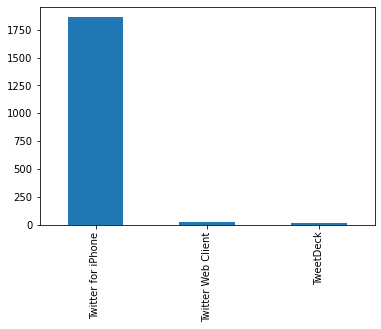

In [47]:
# plot a bar chart showing distribution of device_type.

twitter_archive_master['device_type'].value_counts().plot(kind='bar');

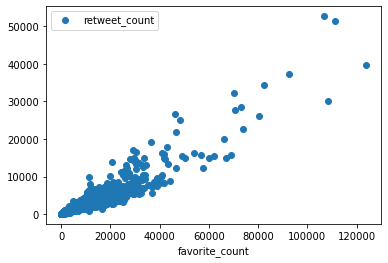

In [48]:
# plot a scatter plot showing correlation between retweet_count and favorite_count.

twitter_archive_master.plot(x='favorite_count', y='retweet_count', style='o');

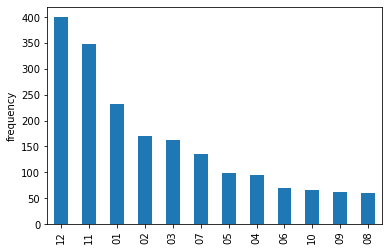

In [49]:
# plot a barchart to show the month distribution of how people tweeted.

fig,ax = plt.subplots()
twitter_archive_master.month.value_counts().plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()